#선형회귀
- califonia housing price dataset
- 집값 예측

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1.데이터 준비

In [31]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [32]:
housing.keys()                   #하우싱이 딕셔너리형태임 (bunch)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [33]:
housing['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [34]:
X=pd.DataFrame(housing['data'],columns=housing['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
Y=pd.DataFrame(housing['target'],columns=housing['target_names'])
Y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [36]:
X['MedHouseVal']=Y['MedHouseVal']
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
df = X.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
df.shape

(20640, 9)

##2.데이터 탐색

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [41]:
df.isna().sum(axis=0)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

##3.테스트 데이터 준비

In [42]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [43]:
X=df.drop('MedHouseVal',axis=1)

In [44]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [45]:
Y = df['MedHouseVal']

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=0)

In [47]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [48]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
X_train.corr()           #상관 계수

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120396,0.358747,-0.059383,0.006284,0.002043,-0.085176,-0.010093
HouseAge,-0.120396,1.000000,-0.162349,-0.077218,-0.299736,0.013631,0.020830,-0.117501
AveRooms,0.358747,-0.162349,1.000000,0.825325,-0.068784,0.005120,0.105380,-0.025010
AveBedrms,-0.059383,-0.077218,0.825325,1.000000,-0.060845,-0.002736,0.068443,0.013283
Population,0.006284,-0.299736,-0.068784,-0.060845,1.000000,0.074734,-0.117704,0.108161
AveOccup,0.002043,0.013631,0.005120,-0.002736,0.074734,1.000000,-0.003676,0.012906
Latitude,-0.085176,0.020830,0.105380,0.068443,-0.117704,-0.003676,1.000000,-0.925158
Longitude,-0.010093,-0.117501,-0.025010,0.013283,0.108161,0.012906,-0.925158,1.000000


<Axes: >

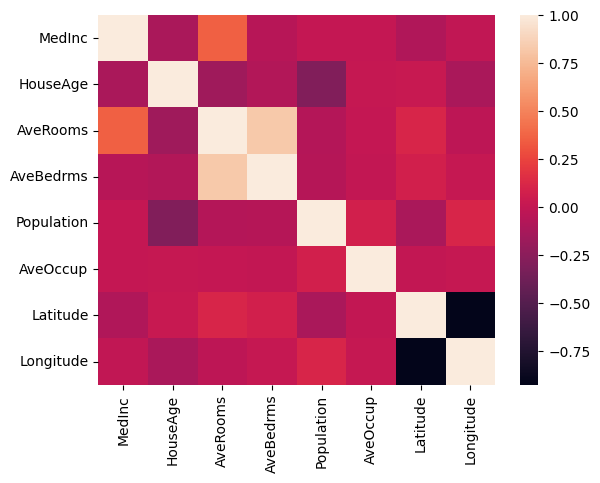

In [50]:
sns.heatmap(X_train.corr())                         # 많이 상관있는 셀들 중 하나는 삭제 해야함

In [51]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [52]:
cols=['MedInc', 'HouseAge', 'AveRooms','Population', 'AveOccup']
X_train=X_train[cols]

##4.데이터 전처리


In [53]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train_s=ss.fit_transform(X_train)
X_train_s[:5]

array([[-1.00030408e+00,  1.85620980e+00, -1.14682300e+00,
        -1.07186955e+00,  2.59828287e-01],
       [-8.49386019e-01,  1.14171192e+00, -7.65854761e-01,
        -5.12515556e-01, -3.27132332e-03],
       [ 1.28620508e+00, -9.22393073e-01,  4.61027223e-01,
        -3.31935474e-02,  1.12103925e-01],
       [-1.13519966e+00, -9.22393073e-01, -1.27009952e+00,
         1.41434152e+00,  1.52625950e-03],
       [-8.70432056e-01,  1.69743250e+00, -3.50004428e-01,
        -7.12595523e-01,  8.56480538e-02]])

In [28]:
Y_train=Y_train.values

##5.학습

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_s,Y_train)

LinearRegression()

In [58]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup'], dtype='object')

In [59]:
lr.coef_           #y=a1x1+a2x2+a3x3+a4x4+a5x5      에서의 a값들(가중치)

array([ 0.85683564,  0.21757495, -0.08628343,  0.0268117 , -0.04176506])

In [60]:
lr.intercept_               #절편 편향 , b

2.0682462451550387

##6.예측 및 성능 평가

In [61]:
X_test = X_test[cols]
X_test_s= ss.transform(X_test)

In [62]:
Y_pred = lr.predict(X_test_s)
Y_pred[:5]

array([2.07007444, 2.96469595, 2.27789975, 1.56551657, 2.55308318])

In [63]:
Y_test = Y_test.values

#####평가

In [64]:
from sklearn.metrics import mean_squared_error

mse =mean_squared_error(Y_test,Y_pred)
print('mse:',mse)
print('RMSE:', np.sqrt(mse))

mse: 0.6779690990730913
RMSE: 0.8233887897421797


#####정답과 예측을 시각화

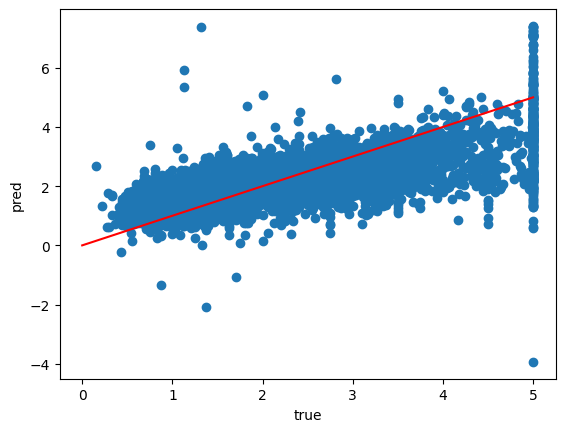

In [65]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.plot([0,5],[0,5],color='red')
plt.show()

## 랜덤 포레스트 회귀

In [66]:
from sklearn.ensemble import RandomForestRegressor

rfr =RandomForestRegressor()
rfr.fit(X_train_s,Y_train)

RandomForestRegressor()

In [67]:
Y_pred = rfr.predict(X_test_s)

In [68]:
mse =mean_squared_error(Y_test,Y_pred)
print('mse:',mse)
print('RMSE:', np.sqrt(mse))

mse: 0.4493630876860807
RMSE: 0.670345498743805


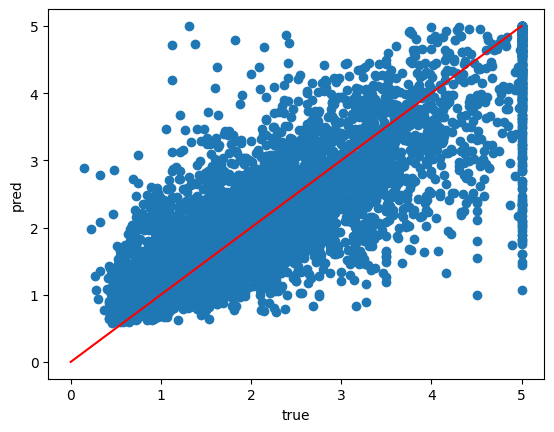

In [69]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.plot([0,5],[0,5],color='red')
plt.show()

##SVR

In [70]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_s,Y_train)
Y_pred =svr.predict(X_test_s)

In [71]:
mse =mean_squared_error(Y_test,Y_pred)
print('mse:',mse)
print('RMSE:', np.sqrt(mse))

mse: 0.4686424930583102
RMSE: 0.6845746804098952


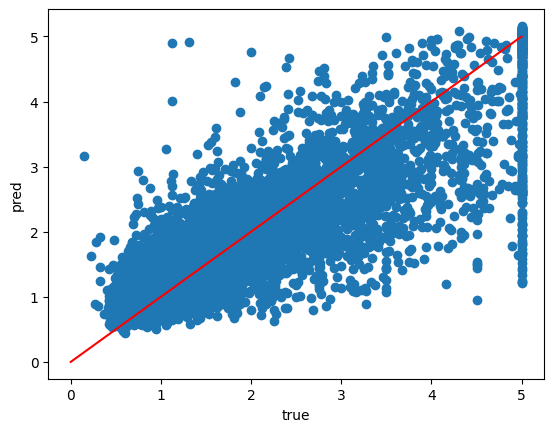

In [72]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.plot([0,5],[0,5],color='red')
plt.show()